#BG1


#DATA CLEANING

In [3]:
import pandas as pd

In [87]:
import pandas as pd
df=pd.read_excel("/content/BG1 1Sep22-1Sep23.xlsx")
df=df.drop_duplicates()
# duplicates should be dropped

In [88]:
df=df.drop_duplicates()

In [89]:
df.shape
df

,dt,values
0,2022-09-01 00:00:00,1303.02
1,2022-09-01 01:00:00,1300.80
2,2022-09-01 02:00:00,1309.60
3,2022-09-01 03:00:00,1358.42
4,2022-09-01 04:00:00,1360.10
...,...,...
8730,2023-08-31 19:00:00,1158.88
8731,2023-08-31 20:00:00,1208.22
8732,2023-08-31 21:00:00,1254.68
8733,2023-08-31 22:00:00,1186.32


In [90]:
#Splitting the column
df['year'] = df['dt'].dt.year
df['month'] = df['dt'].dt.month
df['day'] = df['dt'].dt.day
df['time'] = df['dt'].dt.time
df['minutes']=df['dt'].dt.minute
df['seconds']=df['dt'].dt.second
df['hours']=df['dt'].dt.hour
zeros_minute_count=(df['minutes']==0).sum()
print(zeros_minute_count)
zeros_second_count=(df['seconds']==0).sum()
print(zeros_second_count)
zeros_hour_count=(df['hours']==0).sum()
print(zeros_hour_count)
df

8735
8735
364


,dt,values,year,month,day,time,minutes,seconds,hours
0,2022-09-01 00:00:00,1303.02,2022,9,1,00:00:00,0,0,0
1,2022-09-01 01:00:00,1300.80,2022,9,1,01:00:00,0,0,1
2,2022-09-01 02:00:00,1309.60,2022,9,1,02:00:00,0,0,2
3,2022-09-01 03:00:00,1358.42,2022,9,1,03:00:00,0,0,3
4,2022-09-01 04:00:00,1360.10,2022,9,1,04:00:00,0,0,4
...,...,...,...,...,...,...,...,...,...
8730,2023-08-31 19:00:00,1158.88,2023,8,31,19:00:00,0,0,19
8731,2023-08-31 20:00:00,1208.22,2023,8,31,20:00:00,0,0,20
8732,2023-08-31 21:00:00,1254.68,2023,8,31,21:00:00,0,0,21
8733,2023-08-31 22:00:00,1186.32,2023,8,31,22:00:00,0,0,22


In [91]:
df=df.drop(columns="minutes")
df=df.drop(columns="seconds")
df=df.drop(columns="time")
df=df.drop(columns="dt")
df

,values,year,month,day,hours
0,1303.02,2022,9,1,0
1,1300.80,2022,9,1,1
2,1309.60,2022,9,1,2
3,1358.42,2022,9,1,3
4,1360.10,2022,9,1,4
...,...,...,...,...,...
8730,1158.88,2023,8,31,19
8731,1208.22,2023,8,31,20
8732,1254.68,2023,8,31,21
8733,1186.32,2023,8,31,22


# PER DAY ANALYSIS

In [92]:
Hourly_average_consumption = df.groupby(['year', 'month', 'day'])['values'].mean()
Hourly_average_consumption_df = Hourly_average_consumption.reset_index()
Hourly_average_consumption_df = Hourly_average_consumption_df.rename(columns={'values': 'Hourly_average_consumption'})
Hourly_average_consumption_df

,year,month,day,Hourly_average_consumption
0,2022,9,1,1334.457500
1,2022,9,2,1336.460000
2,2022,9,3,1314.731667
3,2022,9,4,1334.290000
4,2022,9,5,1341.737500
...,...,...,...,...
359,2023,8,27,1133.000833
360,2023,8,28,1120.275833
361,2023,8,29,1089.355833
362,2023,8,30,1096.605833


In [93]:
Hourly_maximum_consumption= df.groupby(['year','month','day'])['values'].max()
Hourly_maximum_consumption_df=Hourly_maximum_consumption.reset_index()
Hourly_maximum_consumption_df=Hourly_maximum_consumption_df.rename(columns={'values' :'Hourly_maximum_consumption' })
Hourly_maximum_consumption_df

,year,month,day,Hourly_maximum_consumption
0,2022,9,1,1391.40
1,2022,9,2,1383.44
2,2022,9,3,1381.62
3,2022,9,4,1391.88
4,2022,9,5,1394.60
...,...,...,...,...
359,2023,8,27,1256.66
360,2023,8,28,1225.56
361,2023,8,29,1159.86
362,2023,8,30,1230.06


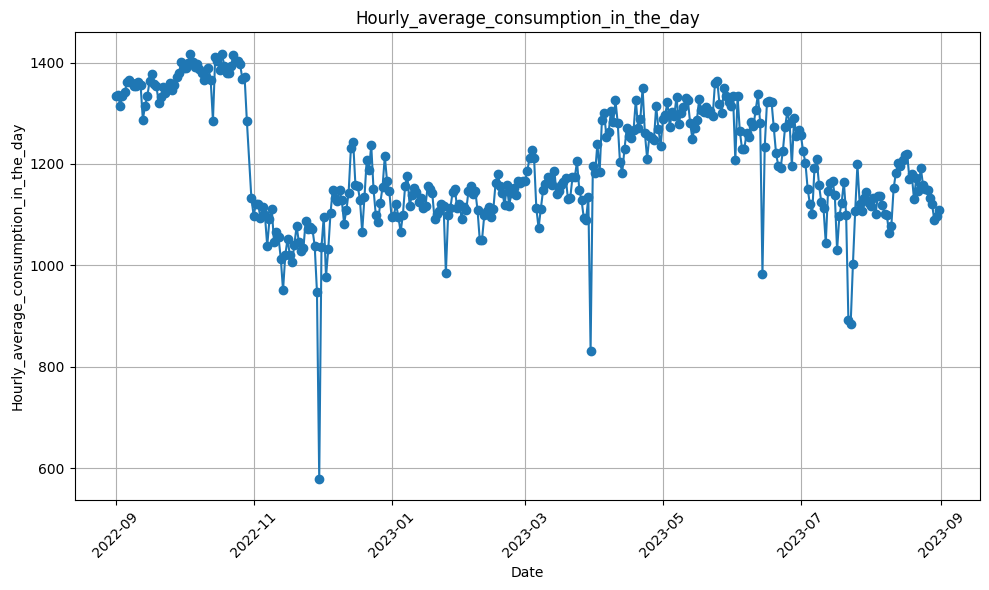

In [94]:
import matplotlib.pyplot as plt

# Assuming you have daily_average_df DataFrame

# Convert 'year', 'month', and 'day' columns to datetime format
Hourly_average_consumption_df['date'] = pd.to_datetime(Hourly_average_consumption_df[['year', 'month', 'day']])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(Hourly_average_consumption_df['date'], Hourly_average_consumption_df['Hourly_average_consumption'], marker='o', linestyle='-')
plt.title('Hourly_average_consumption_in_the_day')
plt.xlabel('Date')
plt.ylabel('Hourly_average_consumption_in_the_day')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

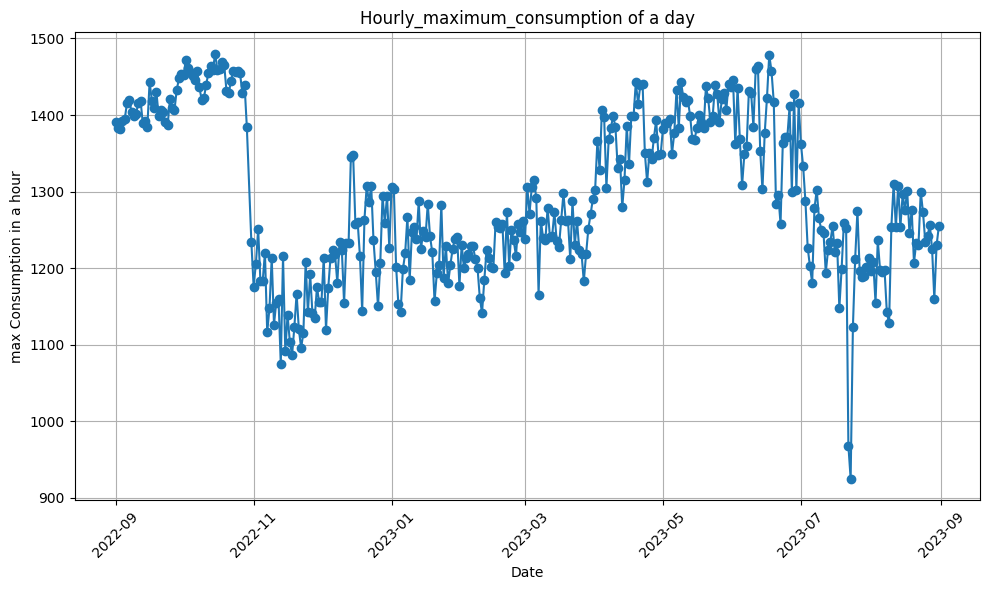

In [95]:
import matplotlib.pyplot as plt

# Assuming you have daily_average_df DataFrame

# Convert 'year', 'month', and 'day' columns to datetime format
Hourly_maximum_consumption_df['date'] = pd.to_datetime(Hourly_maximum_consumption_df[['year', 'month', 'day']])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(Hourly_maximum_consumption_df['date'], Hourly_maximum_consumption_df['Hourly_maximum_consumption'], marker='o', linestyle='-')
plt.title('Hourly_maximum_consumption of a day')
plt.xlabel('Date')
plt.ylabel('max Consumption in a hour')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [96]:
daily_sum= df.groupby(['year','month','day'])['values'].sum()
daily_sum_df=daily_sum.reset_index()
daily_sum_df=daily_sum_df.rename(columns={'values' :'total of the day' })
daily_sum_df

,year,month,day,total of the day
0,2022,9,1,32026.98
1,2022,9,2,32075.04
2,2022,9,3,31553.56
3,2022,9,4,32022.96
4,2022,9,5,32201.70
...,...,...,...,...
359,2023,8,27,27192.02
360,2023,8,28,26886.62
361,2023,8,29,26144.54
362,2023,8,30,26318.54


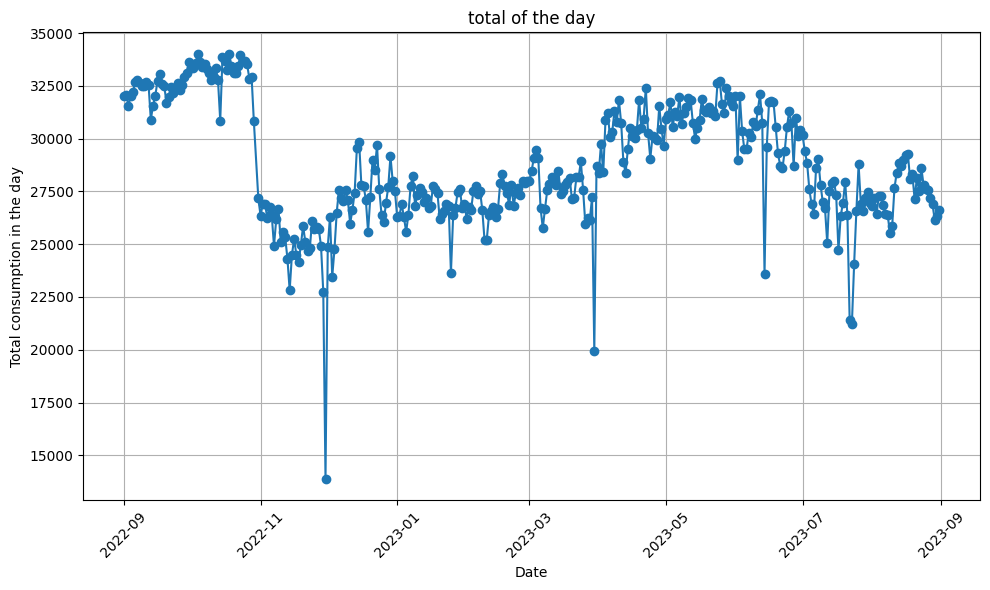

In [97]:
import matplotlib.pyplot as plt

# Assuming you have daily_average_df DataFrame

# Convert 'year', 'month', and 'day' columns to datetime format
daily_sum_df['date'] = pd.to_datetime(daily_sum_df[['year', 'month', 'day']])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(daily_sum_df['date'], daily_sum_df['total of the day'], marker='o', linestyle='-')
plt.title('total of the day')
plt.xlabel('Date')
plt.ylabel('Total consumption in the day')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#PER MONTH ANALYSIS

In [98]:
Daily_average_consumption = daily_sum_df.groupby(['year', 'month'])['total of the day'].mean()
Daily_average_consumption_df=Daily_average_consumption.reset_index()
Daily_average_consumption_df=Daily_average_consumption_df.rename(columns={'total of the day':'Daily_average_consumption'})
Daily_average_consumption_df

,year,month,Daily_average_consumption
0,2022,9,32379.246000
1,2022,10,33014.957333
2,2022,11,24971.923333
3,2022,12,27221.324516
4,2023,1,26836.544516
5,2023,2,27096.585714
6,2023,3,27460.674839
7,2023,4,30273.322000
8,2023,5,31403.144516
9,2023,6,30199.582000


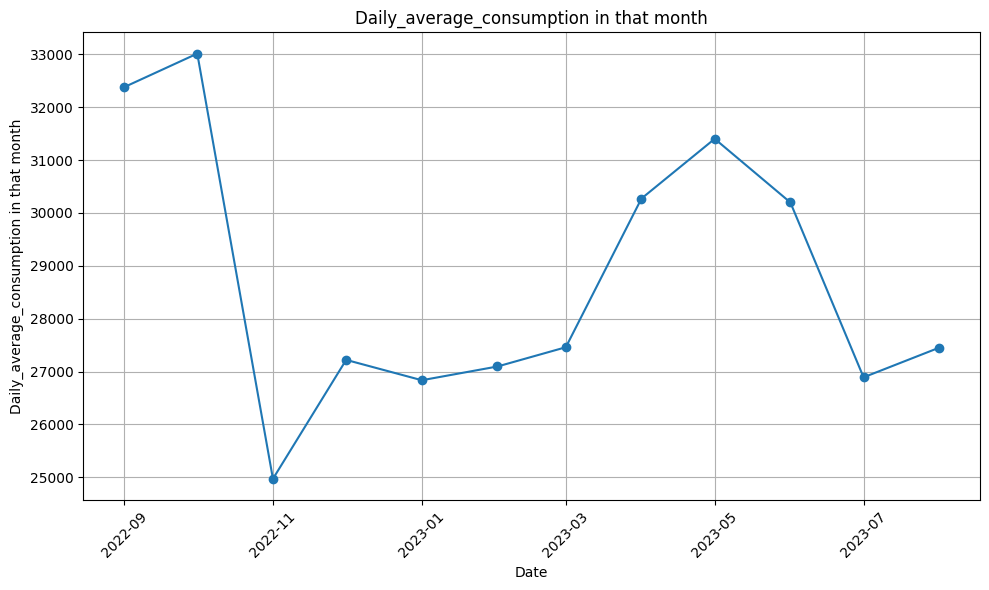

In [99]:
import matplotlib.pyplot as plt

# Assuming you have daily_average_df DataFrame

# Convert 'year', 'month', and 'day' columns to datetime format
Daily_average_consumption_df['date'] = pd.to_datetime({'year': Daily_average_consumption_df['year'], 'month': Daily_average_consumption_df['month'], 'day': 1})


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(Daily_average_consumption_df['date'], Daily_average_consumption_df['Daily_average_consumption'], marker='o', linestyle='-')
plt.title('Daily_average_consumption in that month')
plt.xlabel('Date')
plt.ylabel('Daily_average_consumption in that month')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [100]:
monthly_total = daily_sum_df.groupby(['year', 'month'])['total of the day'].sum()
monthly_total_df=monthly_total.reset_index()
monthly_total_df=monthly_total_df.rename(columns={'total of the day':'monthly_total'})
monthly_total_df

,year,month,monthly_total
0,2022,9,971377.38
1,2022,10,990448.72
2,2022,11,749157.70
3,2022,12,843861.06
4,2023,1,831932.88
5,2023,2,758704.40
6,2023,3,851280.92
7,2023,4,908199.66
8,2023,5,973497.48
9,2023,6,905987.46


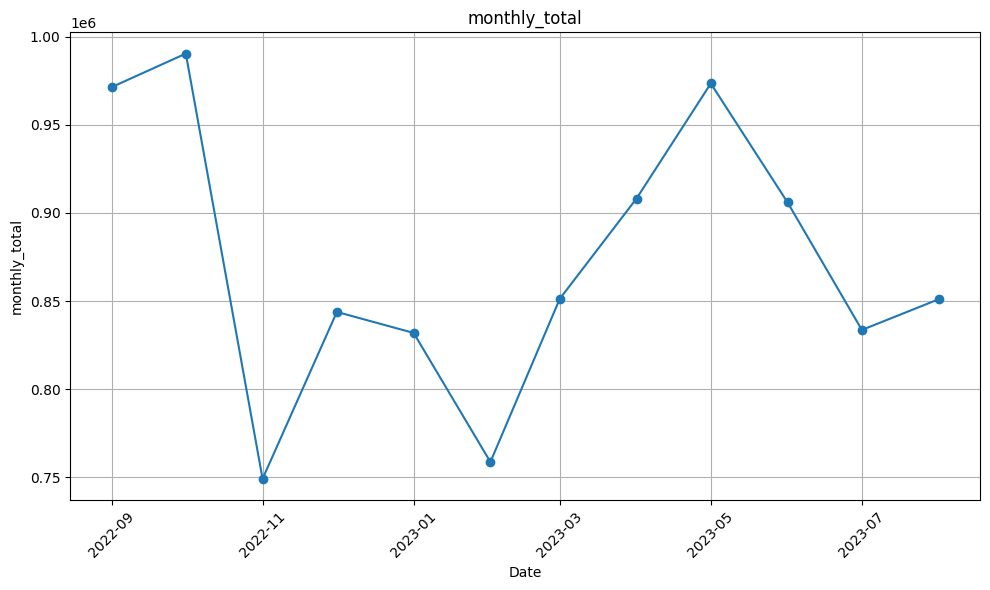

In [101]:
import matplotlib.pyplot as plt

# Assuming you have daily_average_df DataFrame

# Convert 'year', 'month', and 'day' columns to datetime format
monthly_total_df['date'] = pd.to_datetime({'year': monthly_total_df['year'], 'month': monthly_total_df['month'], 'day': 1})


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(monthly_total_df['date'], monthly_total_df['monthly_total'], marker='o', linestyle='-')
plt.title('monthly_total')
plt.xlabel('Date')
plt.ylabel('monthly_total')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [102]:
Daily_maximum_consumption = daily_sum_df.groupby(['year', 'month'])['total of the day'].max()
Daily_maximum_consumption_df=Daily_maximum_consumption.reset_index()
Daily_maximum_consumption_df=Daily_maximum_consumption_df.rename(columns={'total of the day':'maximum in any day'})
Daily_maximum_consumption_df

,year,month,maximum in any day
0,2022,9,33637.80
1,2022,10,34026.64
2,2022,11,26907.24
3,2022,12,29861.00
4,2023,1,28227.14
5,2023,2,28317.64
6,2023,3,29479.46
7,2023,4,32405.20
8,2023,5,32739.62
9,2023,6,32089.92


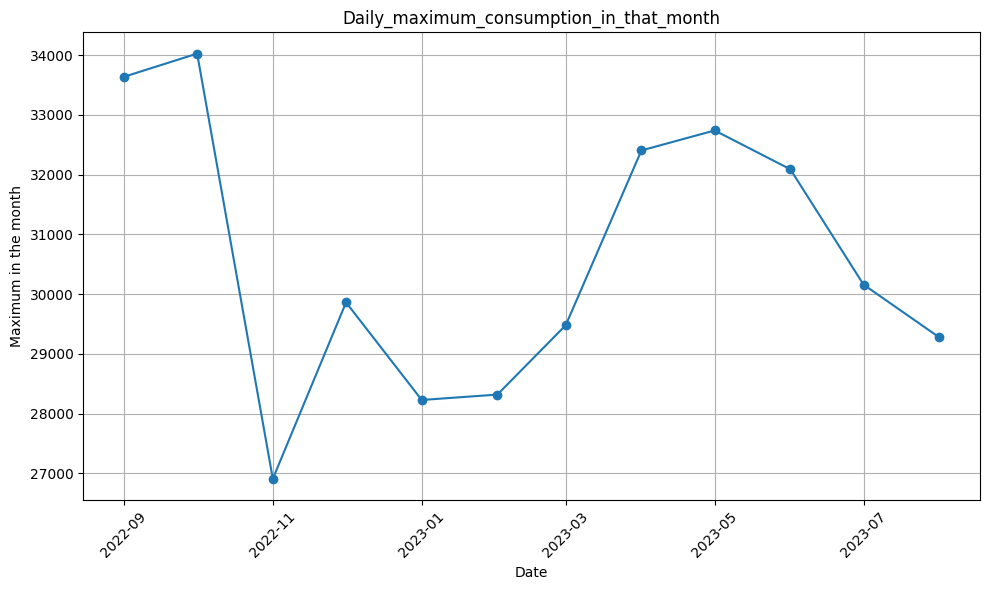

In [103]:
import matplotlib.pyplot as plt

# Assuming you have daily_average_df DataFrame

# Convert 'year', 'month', and 'day' columns to datetime format
Daily_maximum_consumption_df['date'] = pd.to_datetime({'year': Daily_maximum_consumption_df['year'], 'month': Daily_maximum_consumption_df['month'], 'day': 1})


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(Daily_maximum_consumption_df['date'], Daily_maximum_consumption_df['maximum in any day'], marker='o', linestyle='-')
plt.title('Daily_maximum_consumption_in_that_month')
plt.xlabel('Date')
plt.ylabel('Maximum in the month')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Yearly anaysis

In [104]:
Monthly_average_consumption = monthly_total_df.groupby(['year'])['monthly_total'].mean()

In [105]:
Monthly_average_consumption

year
2022    888711.215
2023    864285.985
Name: monthly_total, dtype: float64

In [106]:
mean_daily_consumption = daily_sum_df['total of the day'].mean()
print(mean_daily_consumption)

28761.35368131868


In [107]:
mean_monthly_consumption=monthly_total_df['monthly_total'].mean()
print(mean_monthly_consumption)

872427.7283333334
